In [47]:
import numpy as np
import nibabel as nb
import os
from nilearn.image import threshold_img
from joblib import Parallel, delayed
from nilearn import plotting

In [48]:
# Load sample image f'sub-{subject}_STAB.npy'
example_func = nb.load('/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/func_clean/sub-03_ses-01_task-02a_run-1_cleaned.nii.gz')
STAB_data = np.load('/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/derivatives/mvpa_08_stability_bold/stab_full_masks/sub-03_STAB.npy')

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views


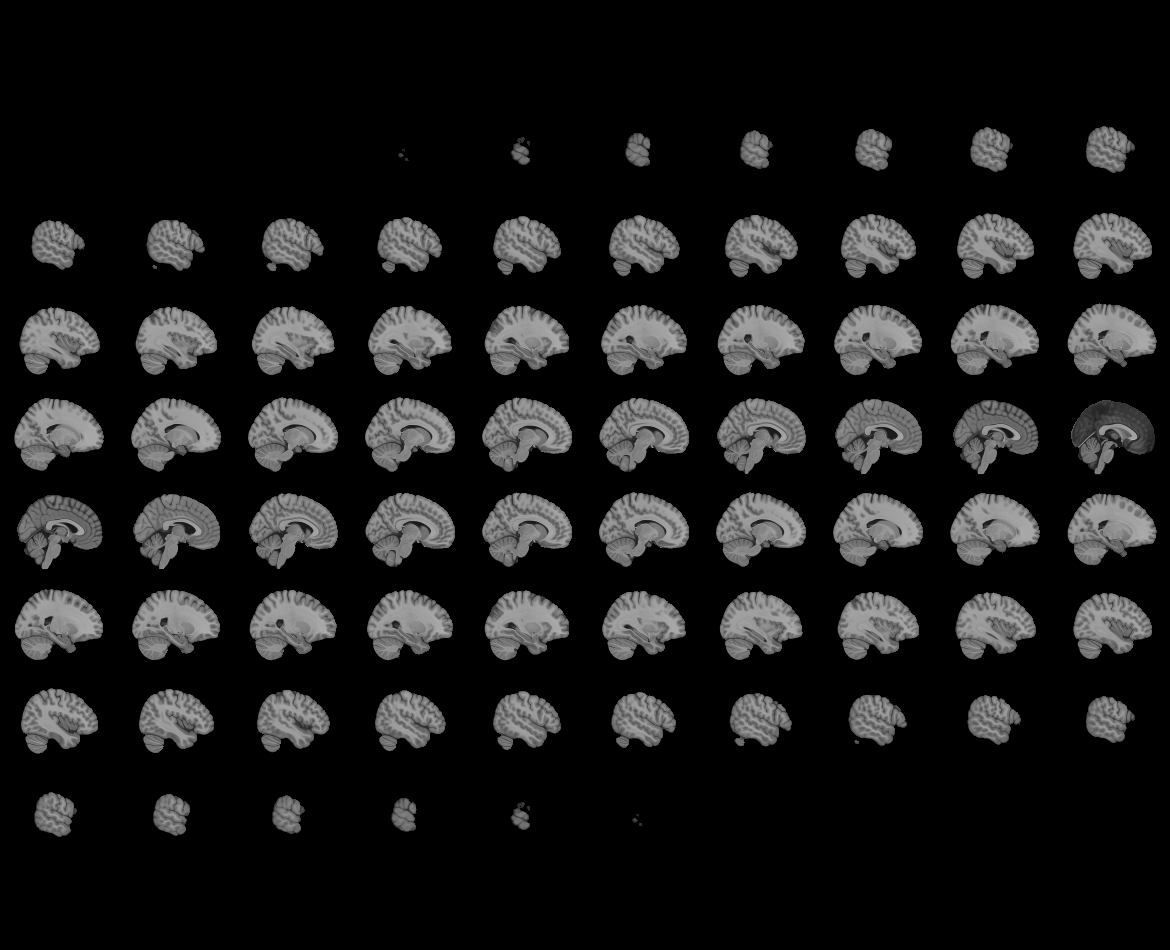
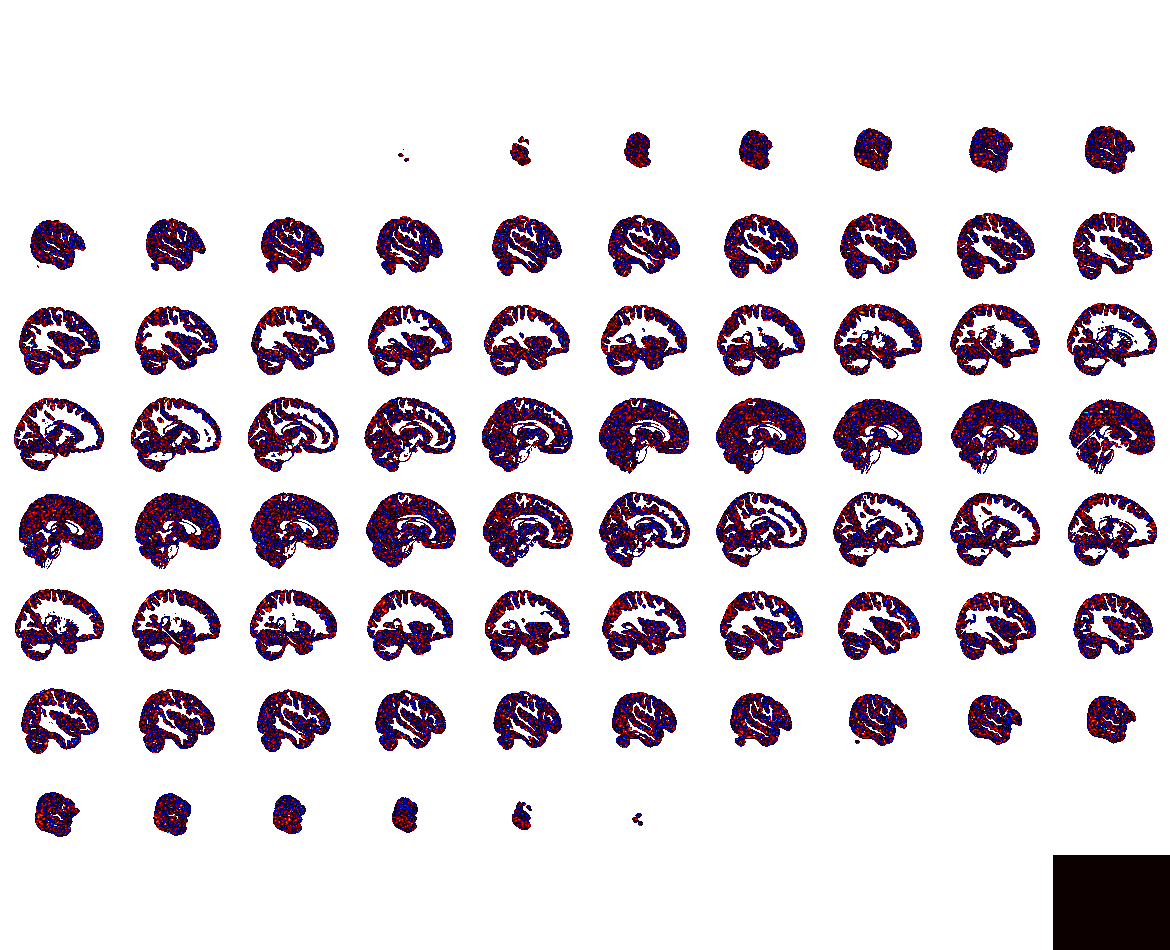

In [42]:
plotting.view_img(example_func.slicer[...,0])

In [43]:
STAB_data.shape

(97, 115, 97)

In [44]:
# mean stability map
STAB_mean_img = nb.Nifti1Image(STAB_data, example_func.affine, example_func.header)

# threshold the stability map
thres = 0.15
STAB_mean_img_thr = threshold_img(STAB_mean_img, threshold=thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views


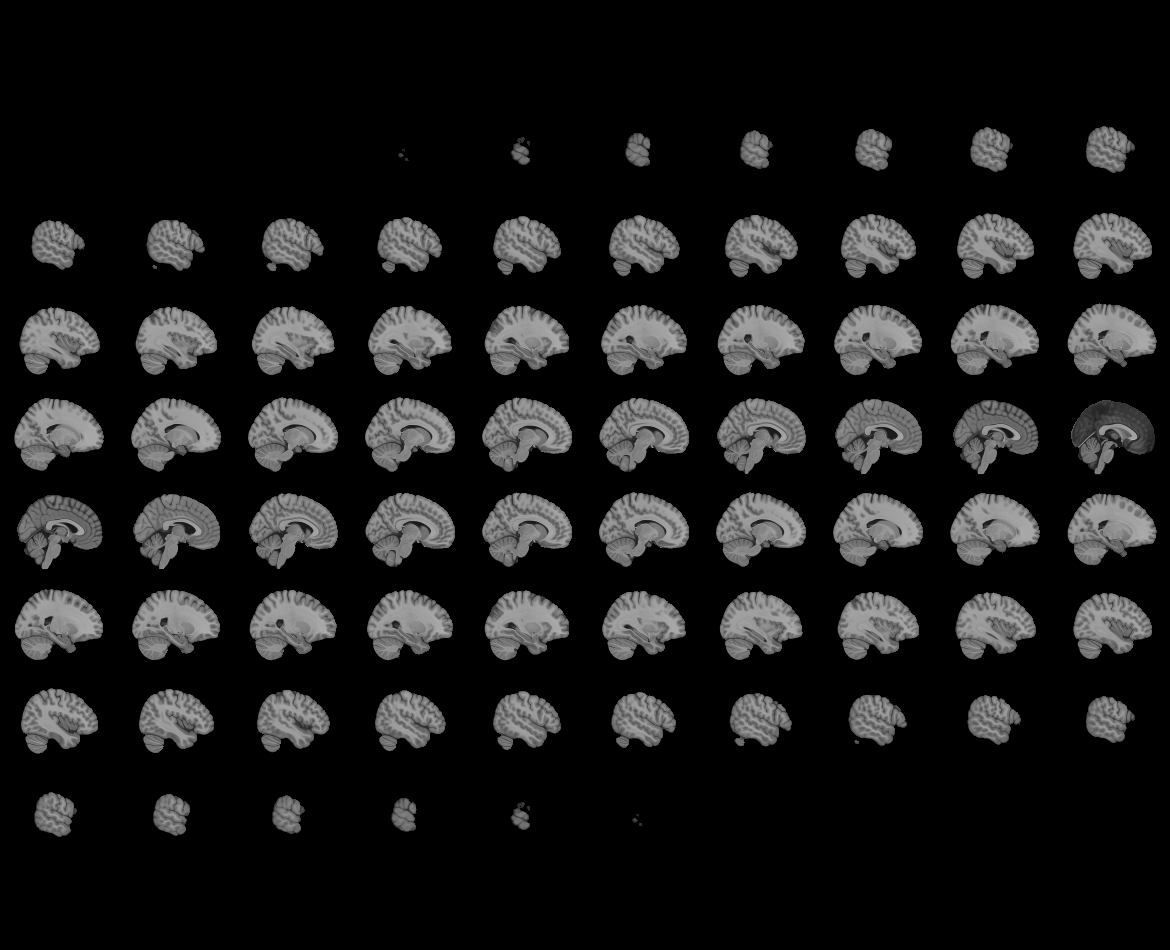
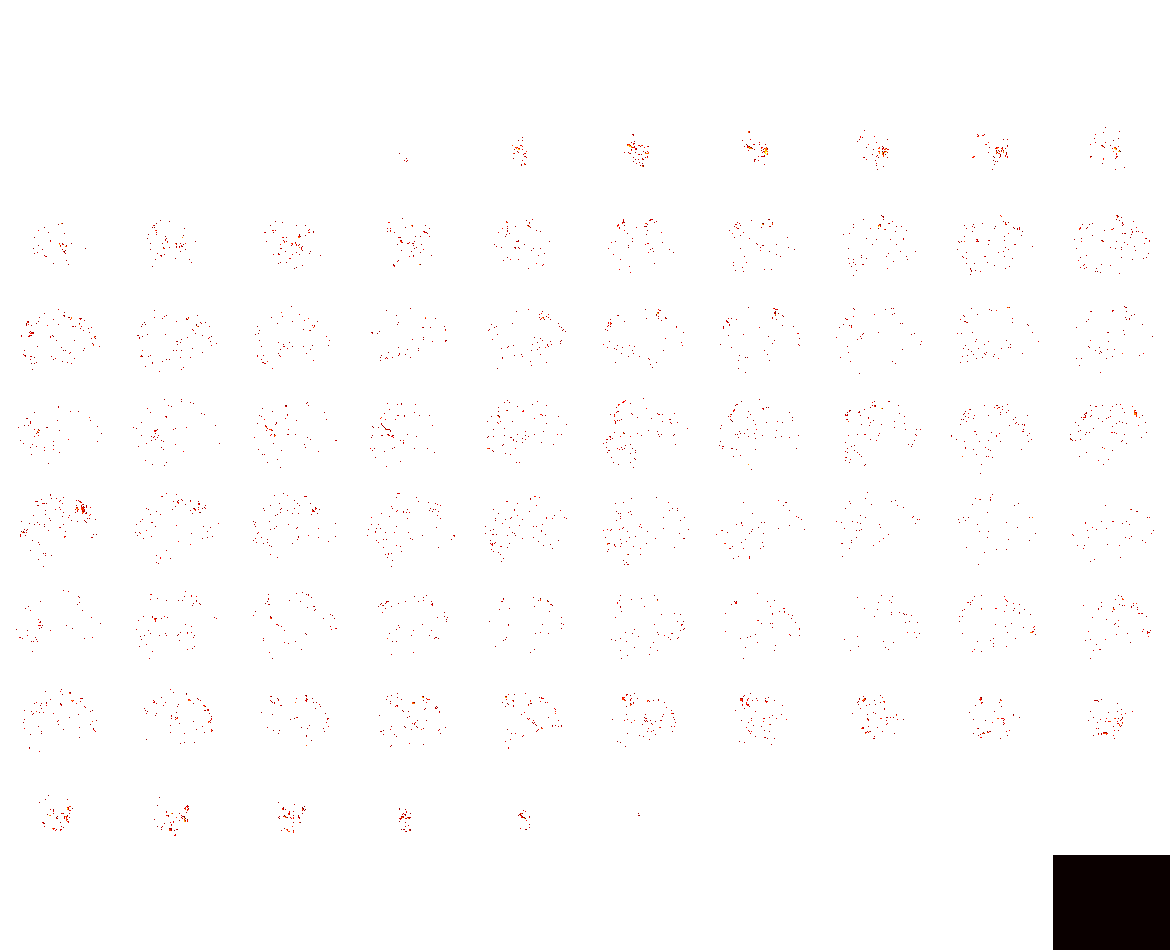

In [45]:
# plot STAB_mean_img_thr with view_img
plotting.view_img(STAB_mean_img_thr, title='STAB', colorbar=True, cmap='hot', symmetric_cmap=False, threshold=thres)

In [46]:
#count number of voxels > 0
print(np.sum(STAB_mean_img_thr.get_fdata() > 0))

4242


## Across subjects - 9 emotions

In [49]:
# Load all *_STAB.npy files in stab_folder
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
stab_mask_dir = os.path.join(data_root, 'derivatives', 'mvpa_08_stability_bold', 'stab_full_masks')

STAB_files = [os.path.join(stab_mask_dir, f) for f in os.listdir(stab_mask_dir) if f.endswith('_STAB.npy') & f.startswith('sub-')]
STAB_files.sort()

In [50]:
n_subjects = len(STAB_files)
n_subjects

19

In [51]:
# load all STAB files
from nilearn import image
STAB = np.zeros((97, 115, 97, n_subjects))
thres_stab = 0.15
#thres_stab = 0.2
for ii, f in enumerate(STAB_files):

    stab_mask_data = np.load(f)
    stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)
    stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres_stab)
    stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

    STAB[..., ii] = stab_mask_img_thres_bin.get_fdata()

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


In [52]:
# compute the sum of stability masks
STAB_mean = np.sum(STAB, axis=3)

In [53]:
# estimate mean stability map
STAB_mean_img = nb.Nifti1Image(STAB_mean, example_func.affine, example_func.header)

# threshold the stability map
thres = 2
STAB_mean_img_thr = threshold_img(STAB_mean_img, threshold=thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/plotting/html_document.py:102: UserWarning: It seems you have created more than 10 nilearn views


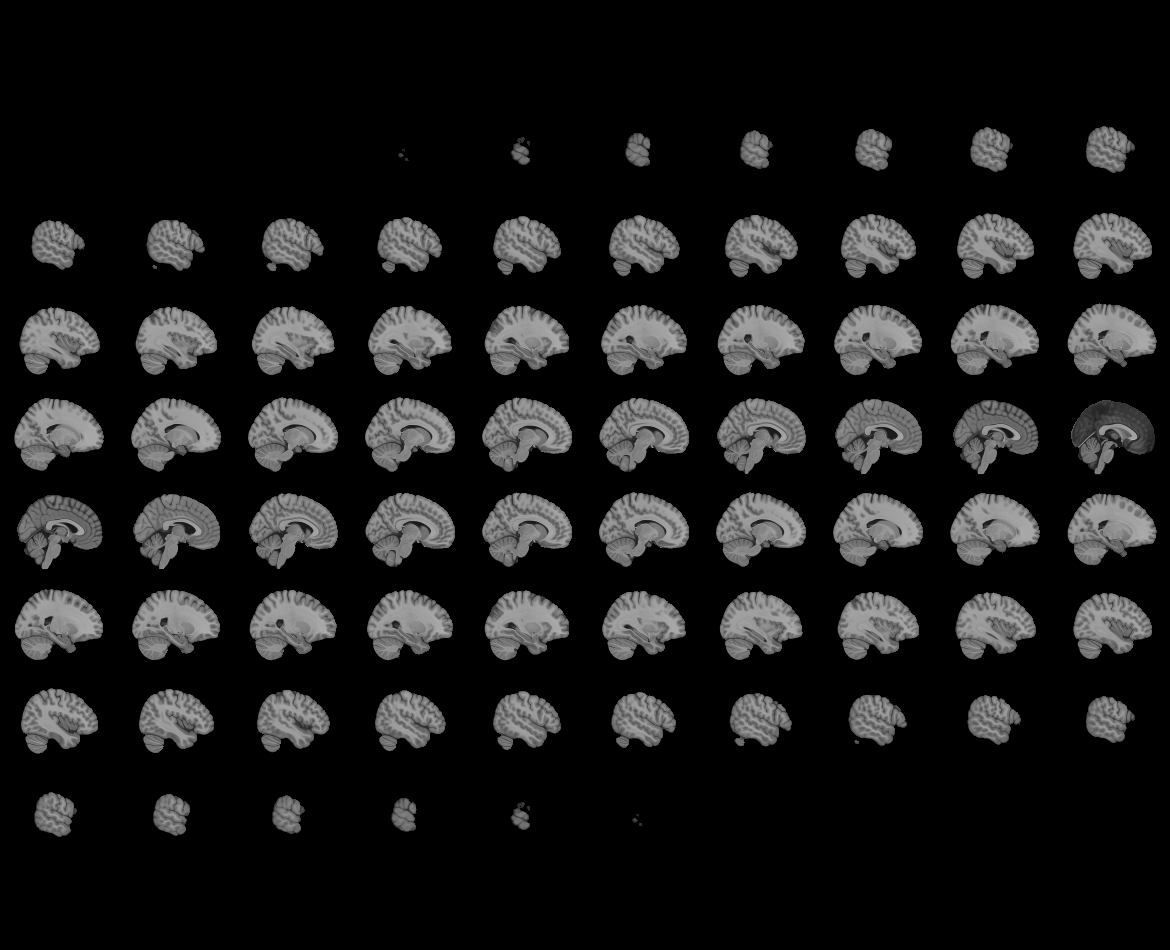
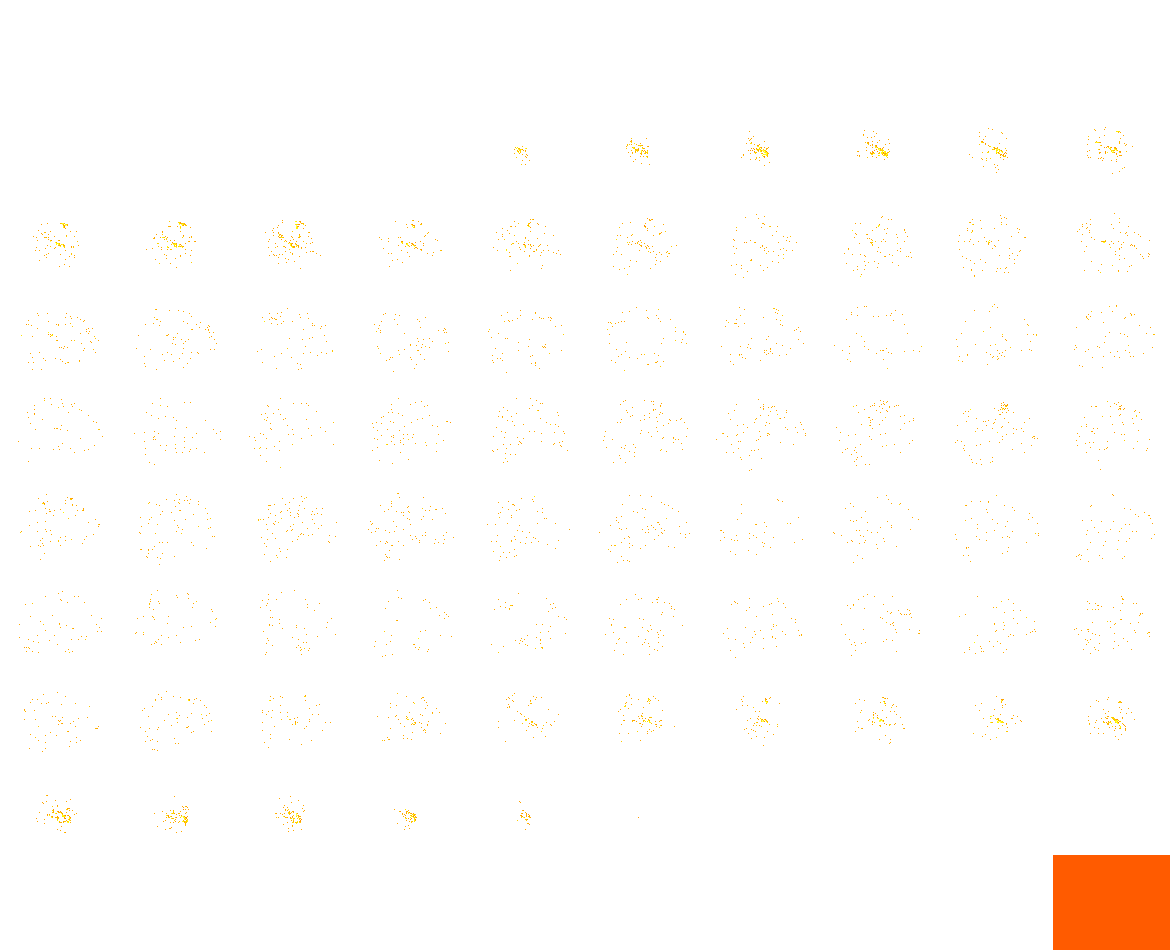

In [54]:
# plot STAB_mean_img_thr with view_img
plotting.view_img(STAB_mean_img_thr, title='STAB', colorbar=True, cmap='hot', width_view=1000)

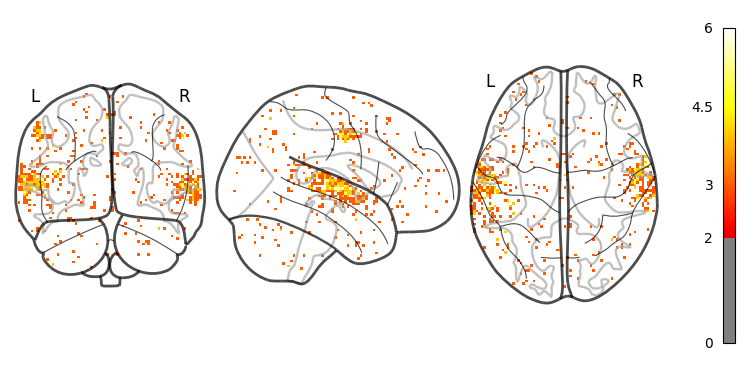

In [55]:
plotting.plot_glass_brain(STAB_mean_img_thr, colorbar=True, cmap='hot', threshold=thres)